The code in this note book is based in the notebook https://github.com/ClementineBleuze/WordEmbeddings/blob/main/Notebooks_dim_clustering/noun_verb_pos_dim_clustering.ipynb, and this notebook is for analysis of number : singular and plural 



In anothor notebook https://github.com/ClementineBleuze/WordEmbeddings/blob/main/Notebooks_dim_correlation/retriving_nomber_information_Noun_Adj.ipynb we obtain the 
Dimension which have largest correlation with number: singular and plural.

As can be seen from the following results, the following experiments on clustering have no obvious results for the analysis of number : singular and plural

In [131]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [187]:

all_n_we = pd.read_csv('../Data/all_nouns_we.csv', index_col=0)
all_nouns_with_freq = pd.read_csv('../Data/freq_NOUN.csv', index_col='Word')
all_nouns_we = all_n_we.merge(all_nouns_with_freq, left_index=True, right_index=True).sort_values(by='freq', ascending=False)



In [191]:
sg_df = all_nouns_we[all_nouns_we["gn"] == "singular"]
pl_df = all_nouns_we[all_nouns_we["gn"] == "plural"]


In [219]:
sg_pl_noun=pd.concat([sg_df.iloc[:3000], pl_df.iloc[:3000]])

sg_pl_noun.loc[sg_pl_noun["gn"] == "singular",'nb']=0
sg_pl_noun.loc[sg_pl_noun["gn"] == "plural",'nb']=1             
                        
            

# NOUN 

54, 310, 288, 243, 278, 511, 3, 119, 77,371

# One dimension 

Dimension 54

In [197]:
dim_n_54=sg_pl_noun.loc[:, ['54', 'gn', 'freq']].sort_values(by='54')

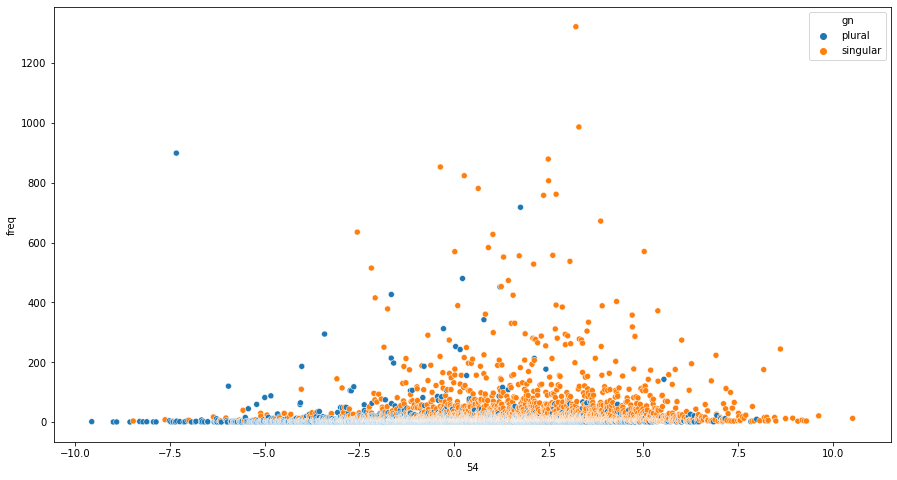

In [198]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_54, x="54", y="freq", hue="gn")

Dimension 310

In [199]:
dim_n_310 = sg_pl_noun.loc[:, ['310', 'gn', 'freq']].sort_values(by='310')

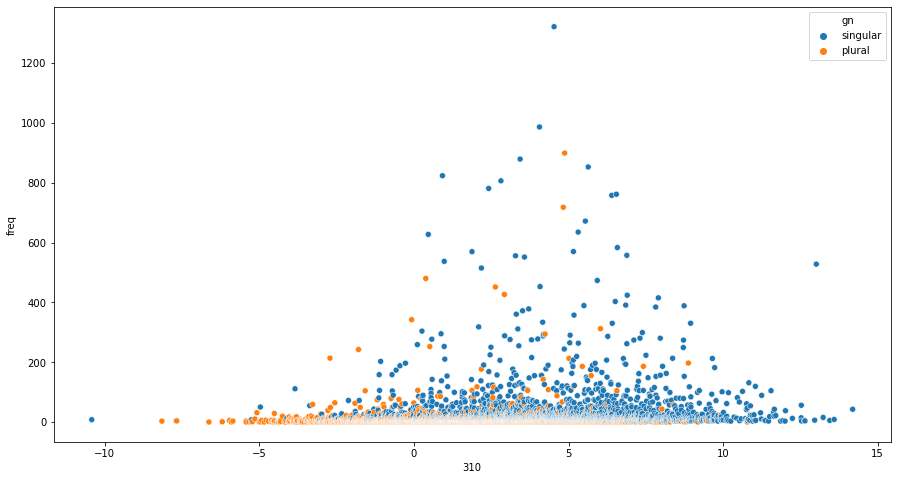

In [200]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_310, x="310", y="freq", hue="gn")

Dimension 278

In [201]:
dim_n_278=sg_pl_noun.loc[:, ['278', 'gn', 'freq']].sort_values(by='278')

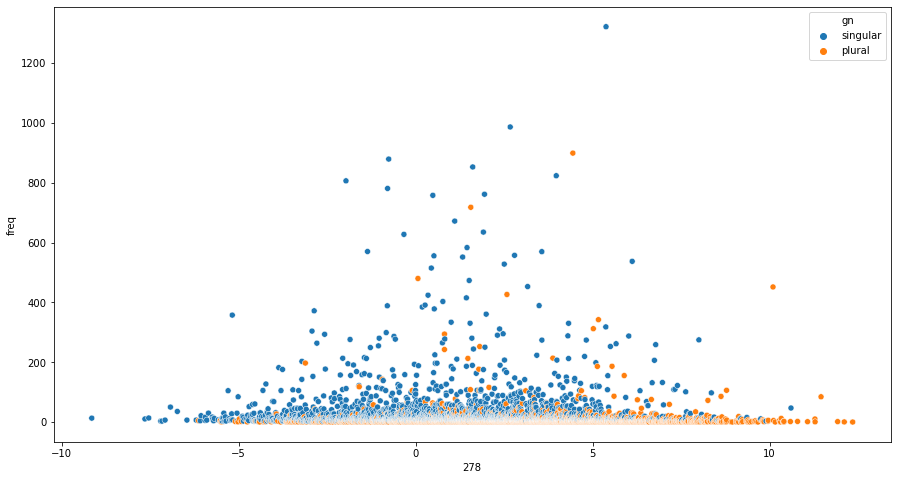

In [202]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_278, x="278", y="freq", hue="gn")

Dimension 288

In [203]:
dim_n_288=sg_pl_noun.loc[:, ['288', 'gn', 'freq']].sort_values(by='288')

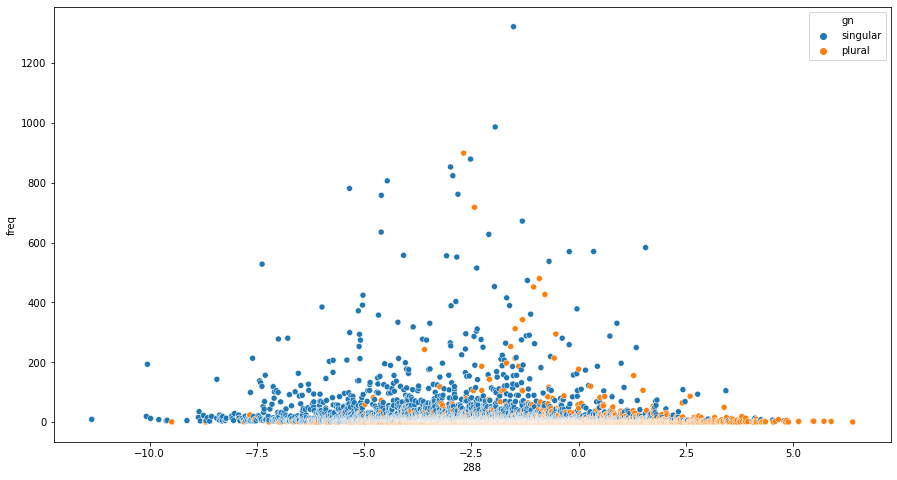

In [204]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_288, x="288", y="freq", hue="gn")

Dimension 243

In [206]:
dim_n_243=sg_pl_noun.loc[:, ['243', 'gn', 'freq']].sort_values(by='243')

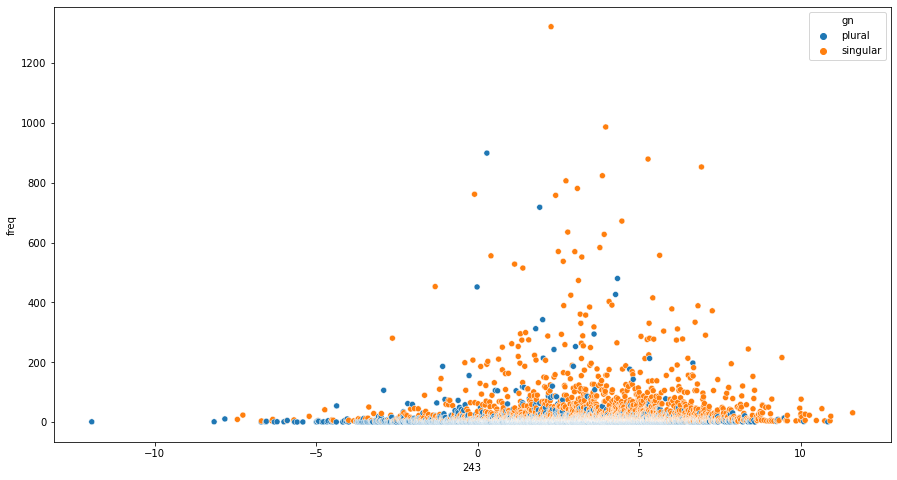

In [207]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_243, x="243", y="freq", hue="gn")

Dimension 511

In [208]:
dim_n_511=sg_pl_noun.loc[:, ['511', 'gn', 'freq']].sort_values(by='511')

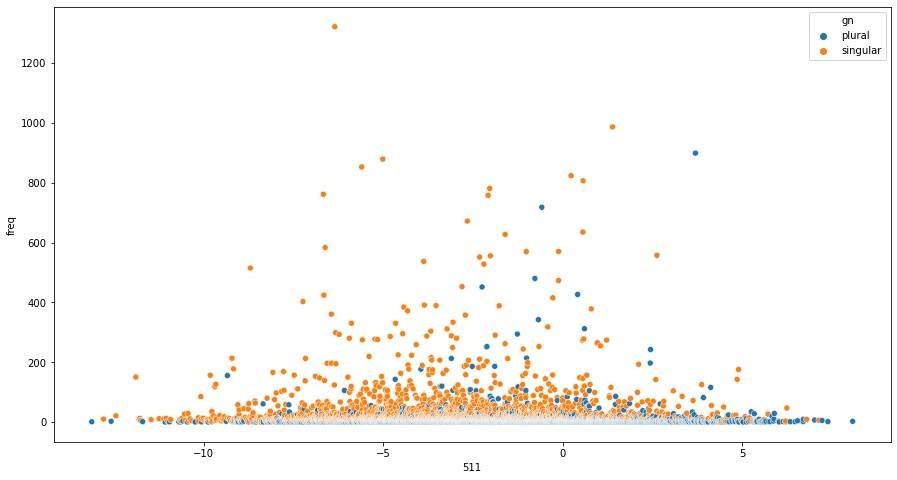

In [209]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_511, x="511", y="freq", hue="gn")

Dimension 3

In [210]:
dim_n_3=sg_pl_noun.loc[:, ['3', 'gn', 'freq']].sort_values(by='3')

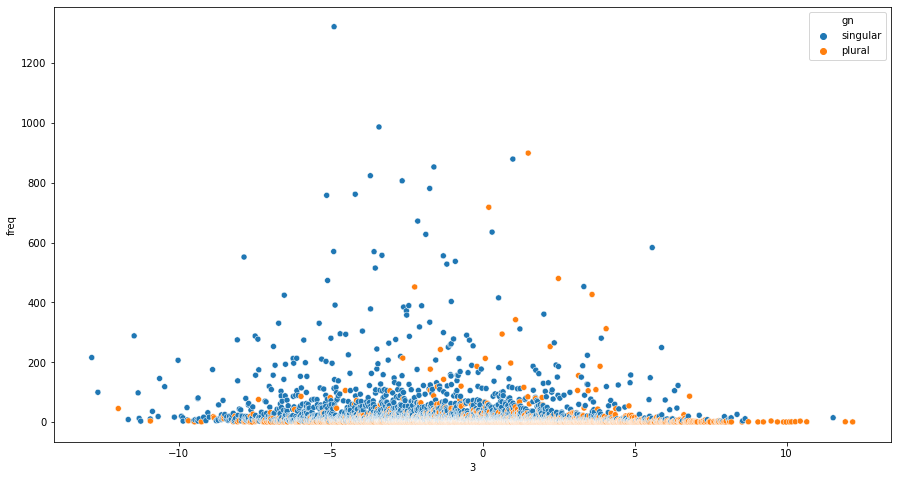

In [211]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_3, x="3", y="freq", hue="gn")

Dimension 371

In [212]:
dim_n_371=sg_pl_noun.loc[:, ['371', 'gn', 'freq']].sort_values(by='371')

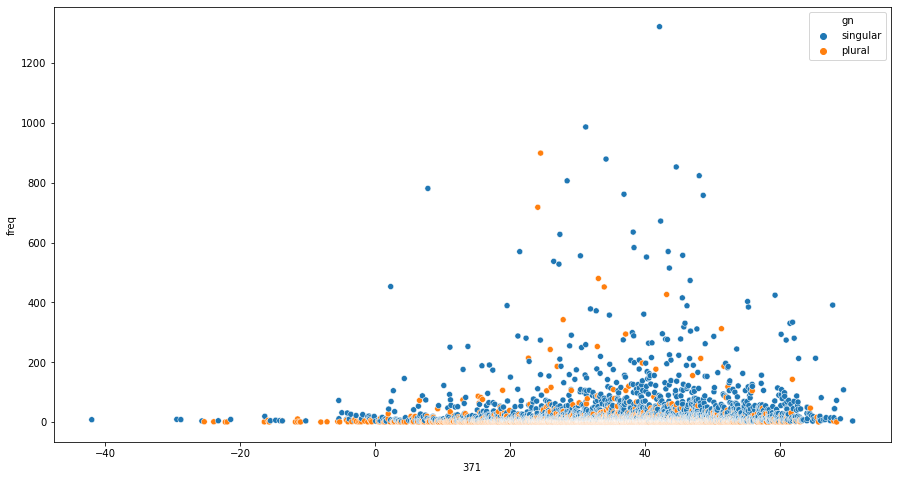

In [213]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_n_371, x="371", y="freq", hue="gn")

# Two dimensions

In [222]:
y_true = sg_pl_noun['nb']
y_true


chose         0.0
vie           0.0
père          0.0
dieu          0.0
monde         0.0
             ... 
parquets      1.0
encres        1.0
turques       1.0
nécessités    1.0
maçons        1.0
Name: nb, Length: 6000, dtype: float64

In [128]:
dimensions = ['310', '54', '278', '288', '243', '511', '3', '119', '77','371']

In [223]:
import sys
sys.path.append('../Util')

from clustering import *

In [225]:
sg_pl_noun

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,gn,gender,lemme,cgram,freq,nb
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,0.059850,-4.353068,-1.477708,-6.344492,singular,feminine,chose,NOM,1321.79,0.0
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-2.438175,-2.297100,-0.613292,1.389376,singular,feminine,vie,NOM,986.59,0.0
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-2.552399,-2.937020,-3.374631,-5.006559,singular,masculine,père,NOM,879.31,0.0
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,-2.373324,-6.390708,0.005803,-5.595995,singular,masculine,dieu,NOM,852.91,0.0
monde,0.209325,-3.771331,3.042938,-3.697068,1.170670,-2.826170,-2.953933,1.451361,1.329781,4.959857,...,-1.666444,-7.071750,1.557441,0.234163,singular,masculine,monde,NOM,823.62,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
parquets,3.458665,-4.209784,1.747891,1.545478,3.432213,-6.174350,-3.829807,-1.380694,-5.054643,-1.114847,...,-3.445579,-3.352128,3.564169,-1.051579,plural,masculine,parquet,NOM,0.32,1.0
encres,-0.440897,-2.960660,-4.058787,3.154485,-0.843954,-5.315630,-1.493076,0.258522,-3.802349,1.769964,...,-3.647895,-3.316372,3.498166,-3.604588,plural,feminine,encre,NOM,0.32,1.0
turques,1.118567,-5.020158,4.254825,-2.217446,-3.670257,-6.318700,-1.216813,-0.485274,7.193911,-0.376361,...,-3.406410,-4.419338,0.752946,3.994593,plural,feminine,turc,NOM,0.32,1.0
nécessités,3.826644,-1.053637,3.505337,3.650668,7.121636,-0.611105,-3.053796,-1.510965,0.381994,-6.037196,...,-2.349538,-4.003231,0.812280,-2.109393,plural,feminine,nécessité,NOM,0.32,1.0


In [226]:
import warnings
warnings.filterwarnings("ignore")

In [227]:
single_dim_df = dimension_clustering_df(y_true,sg_pl_noun.columns[:-6], sg_pl_noun)

In [228]:
dimension_clustering_df(y_true, dimensions, sg_pl_noun)

,P_macro_avg,R_macro_avg,F_macro_avg,P_singular,P_plural,R_singular,R_plural,F_singulars,F_plural,P_micro_avg,R_micro_avg,F_micro_avg,P_singulars,F_singular
dim,,,,,,,,,,,,,,
310,0.686199,0.685833,0.685679,0.694454,0.677944,0.663667,0.708000,0.678711,0.692646,0.685833,0.685833,0.685833,NaN,NaN
54,0.670336,0.670333,0.670332,0.669655,0.671017,0.672333,0.668333,0.670991,0.669673,0.670333,0.670333,0.670333,NaN,NaN
288,0.646121,0.645833,0.645659,0.652599,0.639643,0.623667,0.668000,0.637805,0.653514,0.645833,0.645833,0.645833,NaN,NaN
278,0.640975,0.640833,0.640743,0.645439,0.636511,0.625000,0.656667,0.635055,0.646432,0.640833,0.640833,0.640833,NaN,NaN
243,0.625227,0.622167,0.619844,0.605650,0.644804,0.700333,0.544000,0.649559,0.590128,0.622167,0.622167,0.622167,NaN,NaN
3,0.615415,0.615333,0.615265,0.612338,0.618493,0.628667,0.602000,0.620395,0.610135,0.615333,0.615333,0.615333,NaN,NaN
511,0.593000,0.593000,0.593000,0.593124,0.592876,0.592333,0.593667,0.592728,0.593271,0.593000,0.593000,0.593000,NaN,NaN
119,0.590591,0.590500,0.590397,NaN,0.593460,0.606333,0.574667,NaN,0.583912,0.590500,0.590500,0.590500,0.587722,0.596883
77,0.577696,0.577667,0.577627,0.579198,0.576194,0.568000,0.587333,0.573544,0.581710,0.577667,0.577667,0.577667,NaN,NaN


In [229]:
single_dim_df[:20]

,P_macro_avg,R_macro_avg,F_macro_avg,P_singulars,P_plural,R_singular,R_plural,F_singular,F_plural,P_micro_avg,R_micro_avg,F_micro_avg,P_singular,F_singulars
dim,,,,,,,,,,,,,,
310,0.686199,0.685833,0.685679,NaN,0.677944,0.663667,0.708000,NaN,0.692646,0.685833,0.685833,0.685833,0.694454,0.678711
54,0.670336,0.670333,0.670332,NaN,0.671017,0.672333,0.668333,NaN,0.669673,0.670333,0.670333,0.670333,0.669655,0.670991
288,0.646121,0.645833,0.645659,NaN,0.639643,0.623667,0.668000,NaN,0.653514,0.645833,0.645833,0.645833,0.652599,0.637805
278,0.640975,0.640833,0.640743,NaN,0.636511,0.625000,0.656667,NaN,0.646432,0.640833,0.640833,0.640833,0.645439,0.635055
172,0.628833,0.628833,0.628833,NaN,0.628790,0.628667,0.629000,NaN,0.628895,0.628833,0.628833,0.628833,0.628876,0.628771
285,0.623581,0.623500,0.623438,0.620409,0.626753,0.636333,0.610667,0.628271,0.618605,0.623500,0.623500,0.623500,NaN,NaN
359,0.621767,0.621667,0.621589,NaN,0.625257,0.636000,0.607333,NaN,0.616165,0.621667,0.621667,0.621667,0.618276,0.627013
243,0.625227,0.622167,0.619844,NaN,0.644804,0.700333,0.544000,NaN,0.590128,0.622167,0.622167,0.622167,0.605650,0.649559
328,0.618125,0.617833,0.617598,NaN,0.612258,0.593000,0.642667,NaN,0.627094,0.617833,0.617833,0.617833,0.623992,0.608101


In [230]:
from itertools import combinations

In [231]:
dim_combinations = list(combinations(sg_pl_noun.columns[:-6], 2))

In [232]:
dim_combinations_df = dimension_clustering_df(y_true, dim_combinations, sg_pl_noun, one_dim=False, logs=True)

Current dimension: ('0', '1')
Current dimension: ('1', '491')
Current dimension: ('3', '474')
Current dimension: ('5', '461')
Current dimension: ('7', '452')
Current dimension: ('9', '447')
Current dimension: ('11', '446')
Current dimension: ('13', '449')
Current dimension: ('15', '456')
Current dimension: ('17', '467')
Current dimension: ('19', '482')
Current dimension: ('21', '501')
Current dimension: ('24', '37')
Current dimension: ('26', '66')
Current dimension: ('28', '99')
Current dimension: ('30', '136')
Current dimension: ('32', '177')
Current dimension: ('34', '222')
Current dimension: ('36', '271')
Current dimension: ('38', '324')
Current dimension: ('40', '381')
Current dimension: ('42', '442')
Current dimension: ('44', '507')
Current dimension: ('47', '112')
Current dimension: ('49', '187')
Current dimension: ('51', '266')
Current dimension: ('53', '349')
Current dimension: ('55', '436')
Current dimension: ('58', '74')
Current dimension: ('60', '171')
Current dimension: ('6

In [233]:
dim_combinations_df.sort_values(by='F_macro_avg', ascending=False)[:10] 

,P_macro_avg,R_macro_avg,F_macro_avg,P_singulars,P_plural,R_singular,R_plural,F_singular,F_plural,P_micro_avg,R_micro_avg,F_micro_avg,P_singular,F_singulars
dim,,,,,,,,,,,,,,
"(54, 310)",0.723000,0.723000,0.723000,0.722851,0.723149,0.723333,0.722667,0.723092,0.722908,0.723000,0.723000,0.723000,NaN,NaN
"(310, 359)",0.720654,0.719833,0.719572,0.734114,0.707194,0.689333,0.750333,0.711019,0.728126,0.719833,0.719833,0.719833,NaN,NaN
"(288, 310)",0.712579,0.712333,0.712250,NaN,0.705351,0.695333,0.729333,NaN,0.717142,0.712333,0.712333,0.712333,0.719807,0.707358
"(278, 310)",0.712003,0.712000,0.711999,NaN,0.711155,0.710000,0.714000,NaN,0.712575,0.712000,0.712000,0.712000,0.712851,0.711423
"(172, 310)",0.710476,0.710333,0.710284,NaN,0.715948,0.723333,0.697333,NaN,0.706518,0.710333,0.710333,0.710333,0.705003,0.714051
"(310, 328)",0.708715,0.707833,0.707524,NaN,0.695149,0.675333,0.740333,NaN,0.717030,0.707833,0.707833,0.707833,0.722282,0.698019
"(200, 310)",0.704194,0.704167,0.704157,NaN,0.701812,0.698333,0.710000,NaN,0.705882,0.704167,0.704167,0.704167,0.706577,0.702431
"(183, 310)",0.703855,0.703833,0.703825,0.705962,0.701749,0.698667,0.709000,0.702295,0.705356,0.703833,0.703833,0.703833,NaN,NaN
"(54, 285)",0.703791,0.703667,0.703622,NaN,0.708817,0.716000,0.691333,NaN,0.699966,0.703667,0.703667,0.703667,0.698764,0.707277


Dimension 54 and 310

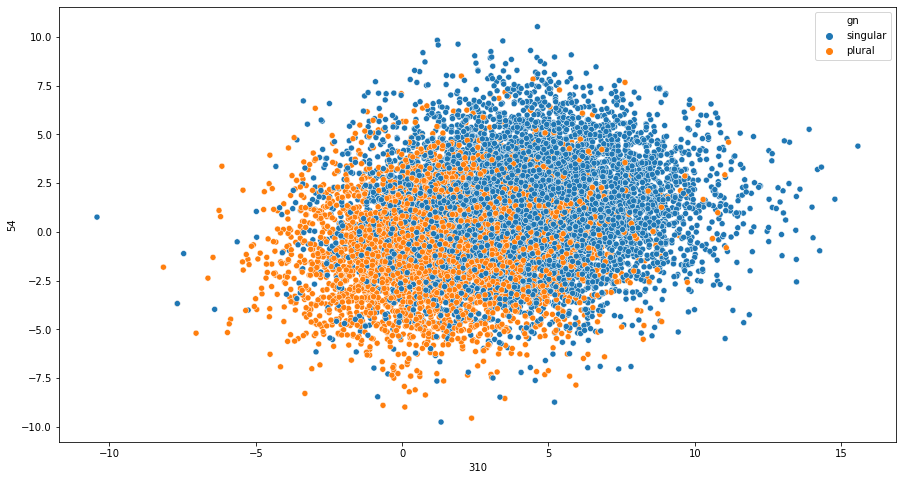

In [96]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=sg_pl_noun, x="310", y="54", hue="gn")

Dimension 359 and 310

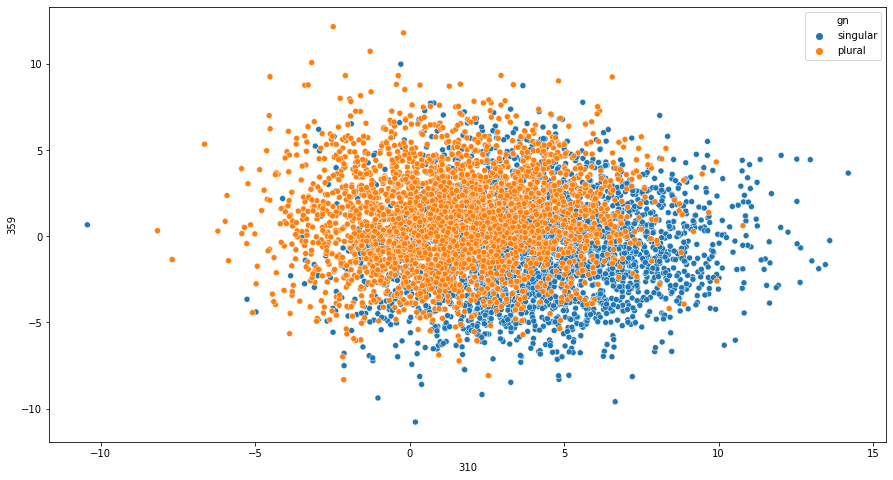

In [234]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=sg_pl_noun, x="310", y="359", hue="gn")

Dimension 288 and 310

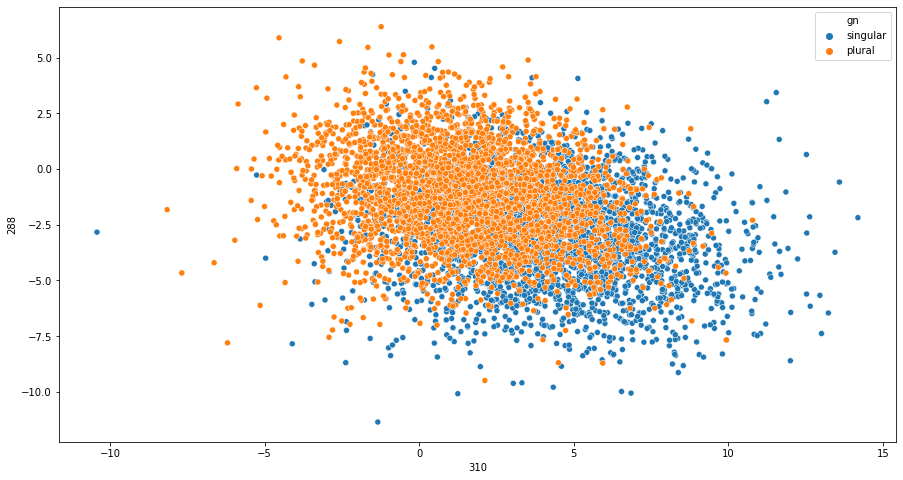

In [235]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=sg_pl_noun, x="310", y="288", hue="gn")

Dimension 278 and 310

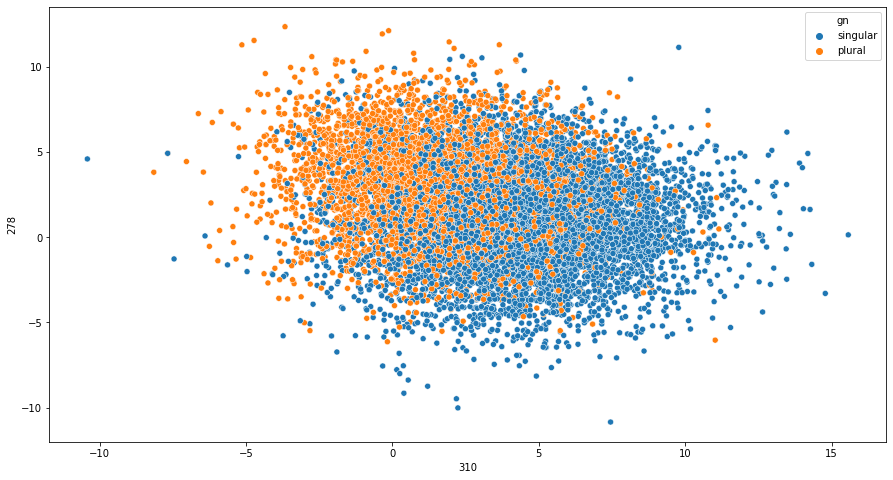

In [236]:

plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=all_nouns_we, x="310", y="278", hue="gn")

In [ ]:
single_dim_df = dimension_clustering_df(y_true, nb_sg_pl.columns[1:-11], nb_sg_pl)

Dimension 54 and 310

In [237]:


triples = add_dimension(dim_combinations_df.index[:100])



In [238]:
triples

[frozenset({('160', '310'), '363'}),
 frozenset({('310', '436'), '417'}),
 frozenset({('243', '310'), '387'}),
 frozenset({('25', '310'), '406'}),
 frozenset({('180', '310'), '45'}),
 frozenset({('278', '310'), '470'}),
 frozenset({('301', '310'), '318'}),
 frozenset({('56', '310'), '8'}),
 frozenset({('289', '310'), '476'}),
 frozenset({('288', '310'), '486'}),
 frozenset({('69', '310'), '334'}),
 frozenset({('81', '310'), '442'}),
 frozenset({('54', '451'), '487'}),
 frozenset({('259', '310'), '308'}),
 frozenset({('117', '310'), '229'}),
 frozenset({('310', '430'), '35'}),
 frozenset({('5', '310'), '61'}),
 frozenset({('310', '381'), '144'}),
 frozenset({('101', '310'), '431'}),
 frozenset({('191', '310'), '45'}),
 frozenset({('54', '285'), '139'}),
 frozenset({('54', '430'), '282'}),
 frozenset({('56', '310'), '221'}),
 frozenset({('60', '310'), '116'}),
 frozenset({('37', '310'), '227'}),
 frozenset({('54', '310'), '227'}),
 frozenset({('65', '310'), '194'}),
 frozenset({('8', '31

#ADJ

310, 5, 54, 384, 84, 278, 192, 250, 385, 371

In [288]:
all_adj_we = pd.read_csv('../Data/all_adjectives_we.csv', index_col=0)
all_adjs_with_freq = pd.read_csv('../Data/top_frequent_pure_ADJ_FlauBERT.csv', index_col='Word')
all_adjs_we = all_adj_we.merge(all_adjs_with_freq, left_index=True, right_index=True).sort_values(by='freqlemlivres', ascending=False)

In [277]:
all_adjs_we

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,Unnamed: 0,lemme,cgram,genre,freqlemlivres,number
vraies,-0.766001,5.622404,4.329558,-7.572945,-1.307733,-4.770501,-6.657547,-4.044977,-2.863130,4.765678,...,-2.003626,-1.788213,1.225246,4.716249,11801,vrai,ADJ,f,430.07,plural
sûre,-2.097601,-1.607397,-0.954145,2.396425,-3.099878,-2.940687,-6.699029,3.444482,-0.241909,-2.309094,...,-2.595740,-9.300162,-0.488513,-4.748943,11802,sûr,ADJ,f,412.97,singular
sûres,-3.041522,-0.340734,0.924801,-2.955962,-1.842081,-2.119136,-4.395124,0.461257,-1.309809,0.124906,...,-1.789158,-9.600093,-0.513777,-1.432615,11803,sûr,ADJ,f,412.97,plural
sûrs,2.140647,3.051942,-2.069170,6.482001,-5.063066,4.626339,-4.386099,-0.698579,2.768317,-2.313851,...,-4.923070,-8.382812,3.058423,3.540627,27,sûr,ADJ,m,412.97,plural
sûr,-2.076443,1.362350,-2.964960,-0.362955,0.903393,-2.109755,-1.871756,4.367917,-0.709638,-2.535209,...,-1.177550,-9.695873,2.848493,-6.239882,26,sûr,ADJ,m,412.97,singular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
compétitif,3.189829,-5.347704,3.705102,-4.460188,-0.643823,-1.483054,1.382843,1.775015,4.753167,2.986146,...,-3.094351,-8.816461,-1.358690,-4.396408,11011,compétitif,ADJ,m,0.00,singular
pluriannuel,2.997172,-2.846149,2.449406,-1.328094,0.787618,0.910569,-3.891743,-0.812817,5.872130,-1.810791,...,-5.669551,-1.360577,0.625836,-4.440475,11492,pluriannuel,ADJ,m,0.00,singular
participative,1.061706,-3.079230,-2.707932,2.187065,4.548586,1.105411,-2.984065,1.237618,-3.989943,1.590695,...,0.105287,-3.661831,-2.149060,3.449498,21996,participatif,ADJ,f,0.00,singular
environnemental,-2.177871,-3.422237,-1.457160,-3.426843,1.831212,-1.987770,-0.037897,5.078370,0.732386,-3.218741,...,-0.914321,-6.294232,-0.050205,-1.911811,11111,environnemental,ADJ,m,0.00,singular


In [312]:
all_adjs_we.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '509', '510', '511', 'Unnamed: 0', 'lemme', 'cgram', 'genre',
       'freqlemlivres', 'number', 'nb'],
      dtype='object', length=519)

In [289]:
all_adjs_we.loc[all_adjs_we['number'] == 'singular', 'nb'] = 0
all_adjs_we.loc[all_adjs_we['number'] == 'plural', 'nb'] = 1

# One dimension 

Dimension 310

In [293]:
dim_adj_310=all_adjs_we.loc[:, ['310', 'nb', 'freqlemlivres']].sort_values(by='310')

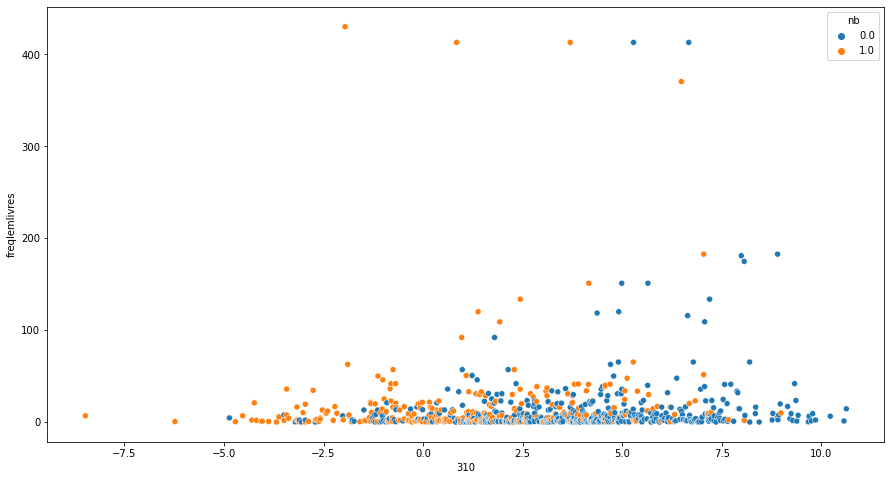

In [295]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_adj_310, x="310", y="freqlemlivres", hue="nb")

dimension 5

In [296]:
dim_adj_5=all_adjs_we.loc[:, ['5', 'nb', 'freqlemlivres']].sort_values(by='5')

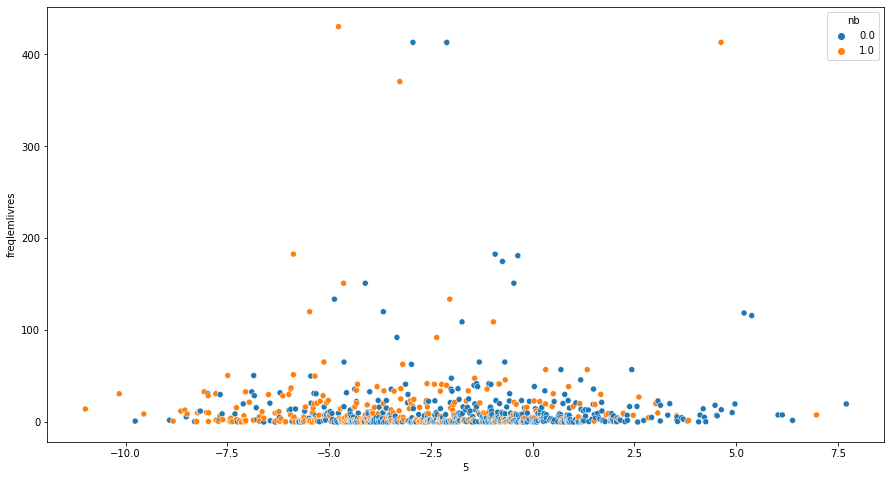

In [297]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_adj_5, x="5", y="freqlemlivres", hue="nb")

Dimension 54

In [298]:
dim_adj_54=all_adjs_we.loc[:, ['54', 'nb', 'freqlemlivres']].sort_values(by='54')

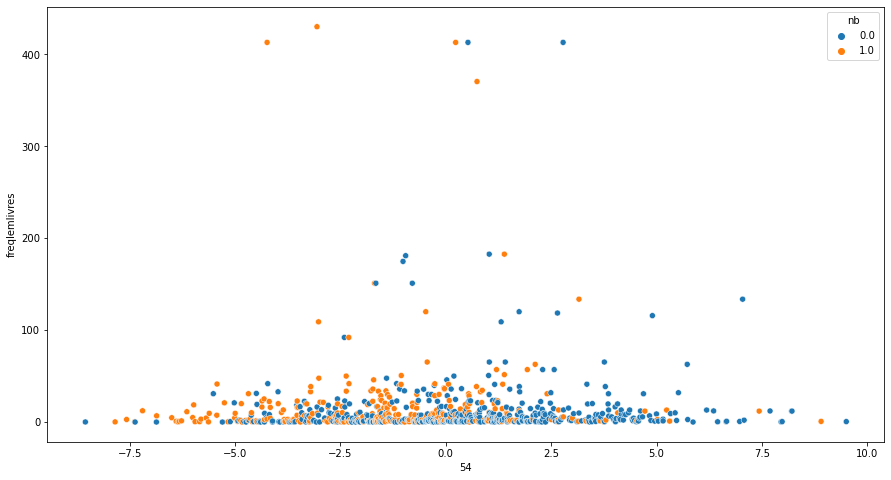

In [299]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_adj_54, x="54", y="freqlemlivres", hue="nb")

Dimension 384

In [301]:
dim_adj_384=all_adjs_we.loc[:, ['384', 'nb', 'freqlemlivres']].sort_values(by='384')

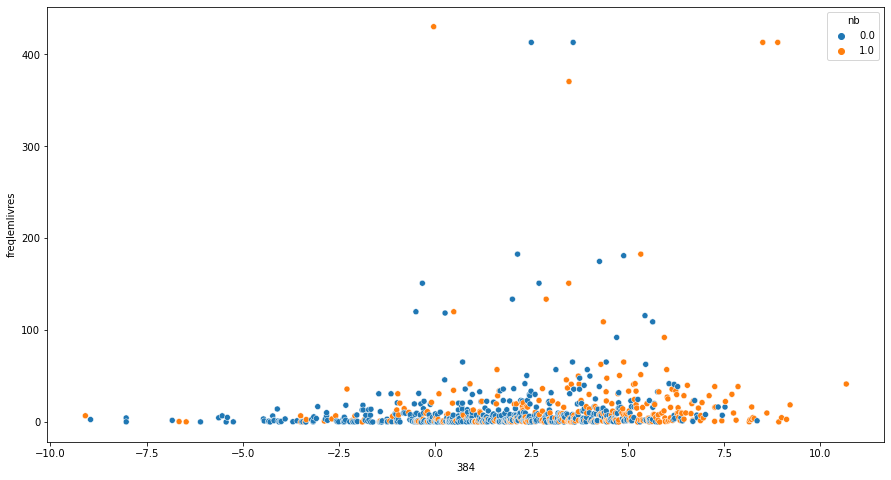

In [303]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_adj_384, x="384", y="freqlemlivres", hue="nb")

Dimension 84

In [304]:
dim_adj_84=all_adjs_we.loc[:, ['84', 'nb', 'freqlemlivres']].sort_values(by='84')

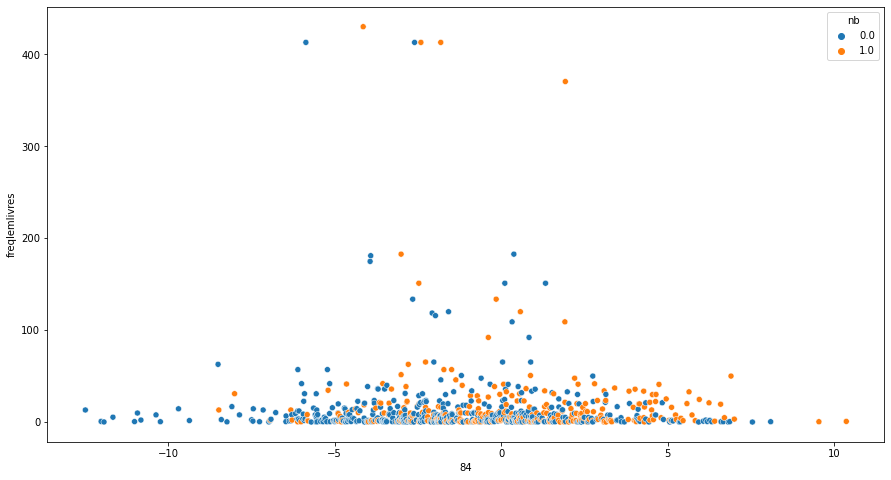

In [305]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_adj_84, x="84", y="freqlemlivres", hue="nb")

Dimension 278

In [306]:
dim_adj_278=all_adjs_we.loc[:, ['278', 'nb', 'freqlemlivres']].sort_values(by='278')

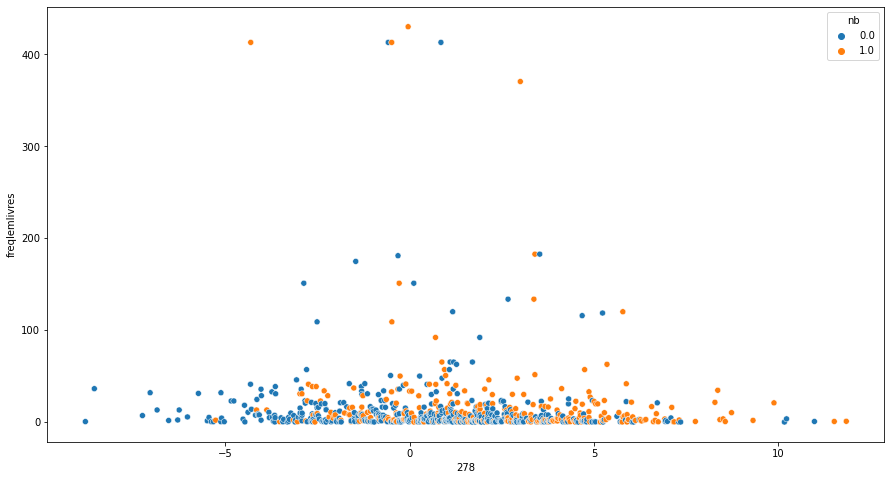

In [308]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=dim_adj_278, x="278", y="freqlemlivres", hue="nb")

Two dimensions

In [309]:
y_true = all_adjs_we['nb']
y_true

vraies             1.0
sûre               0.0
sûres              1.0
sûrs               1.0
sûr                0.0
                  ... 
compétitif         0.0
pluriannuel        0.0
participative      0.0
environnemental    0.0
distale            0.0
Name: nb, Length: 800, dtype: float64

In [310]:
import sys
sys.path.append('../Util')

from clustering import *

In [311]:
import warnings
warnings.filterwarnings("ignore")

In [314]:
single_dim_df = dimension_clustering_df(y_true,all_adjs_we.columns[:-9], all_adjs_we)

In [316]:
dimension_clustering_df(y_true, dimensions, all_adjs_we)

,P_macro_avg,R_macro_avg,F_macro_avg,P_singulars,P_plural,R_singular,R_plural,F_singular,F_plural,P_micro_avg,R_micro_avg,F_micro_avg,P_singular,F_singulars
dim,,,,,,,,,,,,,,
310,0.673111,0.681727,0.672883,0.775176,0.571046,0.674134,0.689320,0.721133,0.624633,0.68000,0.68000,0.68000,NaN,NaN
54,0.622071,0.628705,0.618136,0.733990,0.510152,0.606925,0.650485,0.664437,0.571835,0.62375,0.62375,0.62375,NaN,NaN
278,0.600479,0.605939,0.594169,NaN,0.485222,0.574338,0.637540,NaN,0.551049,0.59875,0.59875,0.59875,0.715736,0.637288
243,0.582233,0.585672,0.581842,NaN,0.477528,0.621181,0.550162,NaN,0.511278,0.59375,0.59375,0.59375,0.686937,0.652406
288,0.579895,0.584248,0.573708,0.694444,0.465347,0.560081,0.608414,0.620068,0.527349,0.57875,0.57875,0.57875,NaN,NaN
511,0.570293,0.573995,0.567111,NaN,0.459530,0.578411,0.569579,NaN,0.508671,0.57500,0.57500,0.57500,0.681055,0.625551
119,0.551348,0.553434,0.550570,NaN,0.443503,0.598778,0.508091,NaN,0.473605,0.56375,0.56375,0.56375,0.659193,0.627535
371,0.540426,0.539695,0.539881,NaN,0.437288,0.661914,0.417476,NaN,0.427152,0.56750,0.56750,0.56750,0.643564,0.652610
3,0.544121,0.546500,0.536498,0.658974,0.429268,0.523422,0.569579,0.583428,0.489569,0.54125,0.54125,0.54125,NaN,NaN


In [317]:
single_dim_df[:20]

,P_macro_avg,R_macro_avg,F_macro_avg,P_singular,P_plural,R_singular,R_plural,F_singulars,F_plural,P_micro_avg,R_micro_avg,F_micro_avg,P_singulars,F_singular
dim,,,,,,,,,,,,,,
310,0.673111,0.681727,0.672883,NaN,0.571046,0.674134,0.689320,NaN,0.624633,0.68000,0.68000,0.68000,0.775176,0.721133
250,0.642857,0.649629,0.630558,0.768392,0.517321,0.574338,0.724919,0.657343,0.603774,0.63250,0.63250,0.63250,NaN,NaN
81,0.633229,0.640394,0.626263,NaN,0.515815,0.594705,0.686084,NaN,0.588889,0.63000,0.63000,0.63000,0.750643,0.663636
54,0.622071,0.628705,0.618136,NaN,0.510152,0.606925,0.650485,NaN,0.571835,0.62375,0.62375,0.62375,0.733990,0.664437
309,0.618872,0.625106,0.616633,NaN,0.510471,0.619145,0.631068,NaN,0.564399,0.62375,0.62375,0.62375,0.727273,0.668867
5,0.618929,0.625288,0.616011,0.728814,0.509044,0.613035,0.637540,0.665929,0.566092,0.62250,0.62250,0.62250,NaN,NaN
9,0.613360,0.619540,0.607754,0.727960,0.498759,0.588595,0.650485,0.650901,0.564607,0.61250,0.61250,0.61250,NaN,NaN
403,0.603192,0.606038,0.603880,0.700431,0.505952,0.661914,0.550162,0.680628,0.527132,0.61875,0.61875,0.61875,NaN,NaN
208,0.622588,0.625970,0.600795,NaN,0.489224,0.517312,0.734628,NaN,0.587322,0.60125,0.60125,0.60125,0.755952,0.614268


In [318]:
from itertools import combinations

In [319]:
dim_combinations = list(combinations(all_adjs_we.columns[:-9], 2))

In [320]:
dim_combinations_df = dimension_clustering_df(y_true, dim_combinations, all_adjs_we, one_dim=False, logs=True)

Current dimension: ('0', '1')
Current dimension: ('1', '493')
Current dimension: ('3', '480')
Current dimension: ('5', '471')
Current dimension: ('7', '466')
Current dimension: ('9', '465')
Current dimension: ('11', '468')
Current dimension: ('13', '475')
Current dimension: ('15', '486')
Current dimension: ('17', '501')
Current dimension: ('20', '31')
Current dimension: ('22', '56')
Current dimension: ('24', '85')
Current dimension: ('26', '118')
Current dimension: ('28', '155')
Current dimension: ('30', '196')
Current dimension: ('32', '241')
Current dimension: ('34', '290')
Current dimension: ('36', '343')
Current dimension: ('38', '400')
Current dimension: ('40', '461')
Current dimension: ('43', '60')
Current dimension: ('45', '131')
Current dimension: ('47', '206')
Current dimension: ('49', '285')
Current dimension: ('51', '368')
Current dimension: ('53', '455')
Current dimension: ('56', '93')
Current dimension: ('58', '190')
Current dimension: ('60', '291')
Current dimension: ('62

In [321]:
dim_combinations_df.sort_values(by='F_macro_avg', ascending=False)[:10] 

,P_macro_avg,R_macro_avg,F_macro_avg,P_singulars,P_plural,R_singular,R_plural,F_singular,F_plural,P_micro_avg,R_micro_avg,F_micro_avg,P_singular,F_singulars
dim,,,,,,,,,,,,,,
"(250, 310)",0.730057,0.742491,0.728254,0.838631,0.621483,0.698574,0.786408,0.762222,0.694286,0.73250,0.73250,0.73250,NaN,NaN
"(81, 310)",0.711892,0.717188,0.713838,0.790150,0.633634,0.751527,0.682848,0.770355,0.657321,0.72500,0.72500,0.72500,NaN,NaN
"(172, 310)",0.710553,0.719712,0.712164,0.802721,0.618384,0.720978,0.718447,0.759657,0.664671,0.72000,0.72000,0.72000,NaN,NaN
"(175, 310)",0.698411,0.705568,0.700289,0.785872,0.610951,0.725051,0.686084,0.754237,0.646341,0.71000,0.71000,0.71000,NaN,NaN
"(63, 310)",0.697199,0.705330,0.698795,0.788764,0.605634,0.714868,0.695793,0.750000,0.647590,0.70750,0.70750,0.70750,NaN,NaN
"(309, 310)",0.699324,0.710198,0.694975,0.814070,0.584577,0.659878,0.760518,0.728909,0.661041,0.69875,0.69875,0.69875,NaN,NaN
"(310, 470)",0.692991,0.698314,0.694793,0.775862,0.610119,0.733198,0.663430,0.753927,0.635659,0.70625,0.70625,0.70625,NaN,NaN
"(273, 310)",0.692877,0.700476,0.694528,0.783482,0.602273,0.714868,0.686084,0.747604,0.641452,0.70375,0.70375,0.70375,NaN,NaN
"(5, 310)",0.692496,0.700657,0.693912,0.785553,0.599440,0.708758,0.692557,0.745182,0.642643,0.70250,0.70250,0.70250,NaN,NaN


Dimension 250 and 310

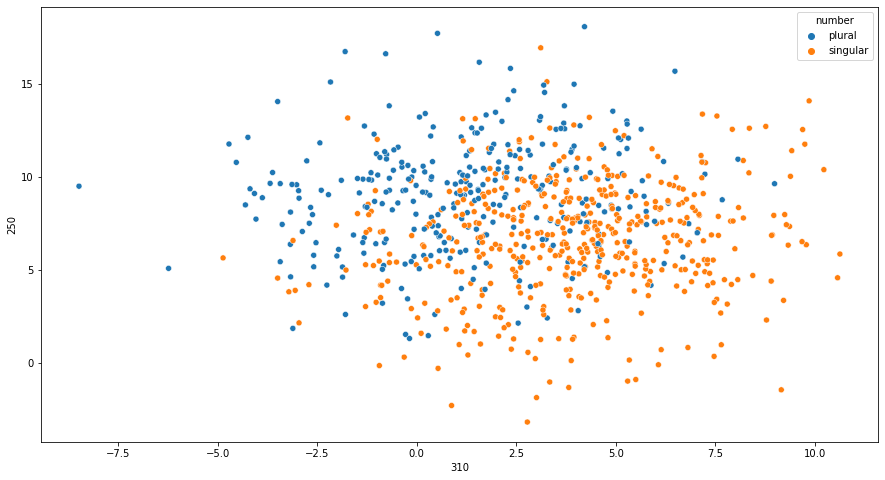

In [325]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=all_adjs_we, x="310", y="250", hue="number")

Dimension 81 and 310

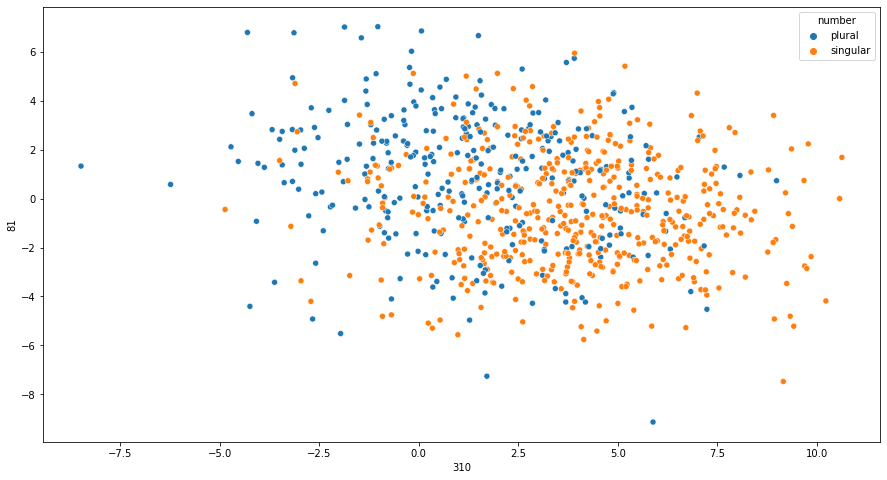

In [326]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=all_adjs_we, x="310", y="81", hue="number")

Dimension 172 and 310

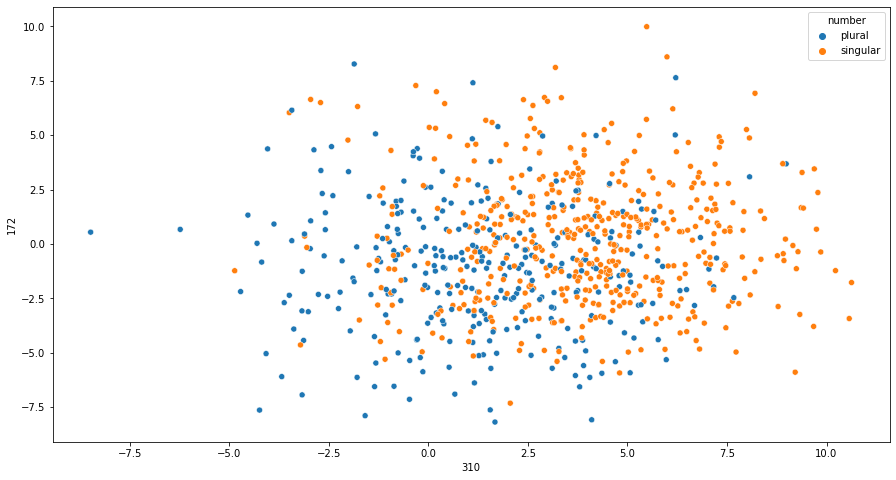

In [327]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=all_adjs_we, x="310", y="172", hue="number")

Dimension 175 and 310

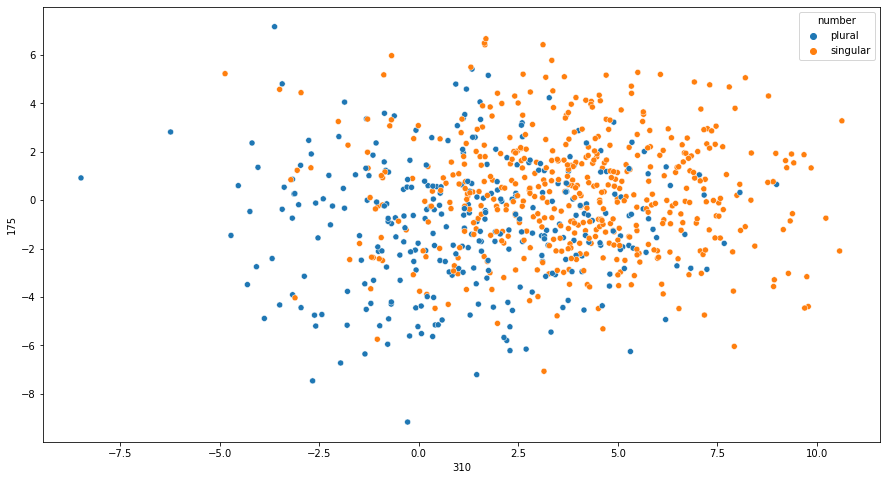

In [328]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=all_adjs_we, x="310", y="175", hue="number")